# Projet : Loan Prediction (Automation)

>Data collection 


In this project, we will predict whether a customer will get the loan from bank or not.
The following features are:

1. Gender
2. Education
3. Marrital status
4. Loand Amount
5. Credit History
6. Account Balance
7. Property Area
8. Credit History
9. Dependants
10. Self Employment Status



* Using these features, we will create a predictive model that predicts the target variable which is the loan status representing whether the loan will be approved or not.


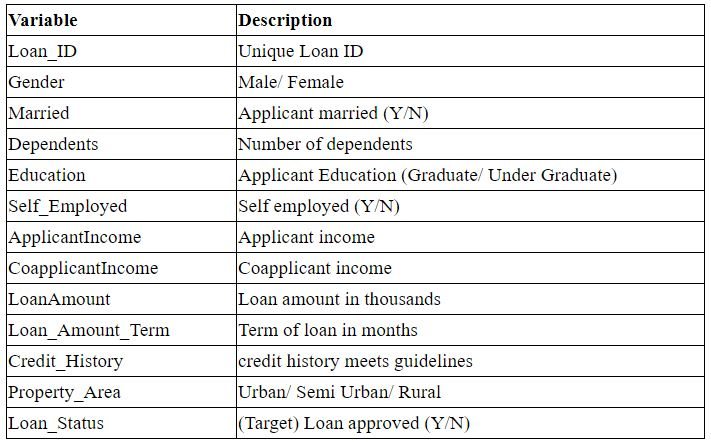

>Import librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import pickle

# We going to load the database 
df_credit = pd.read_csv(r"C:\Users\maeva\OneDrive\Documents\Portfolio\train.csv")
df_credit

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [2]:
#We copy this database with another one (df) so that we can make modification with the new one 
df = df_credit.copy()

### Data cleaning

In [3]:
df.info()
#We are going to check if there is no missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

To remove missing values:
- for the categorical variables: we will replace them with the **mode**.
- For numeric variables: we will replace them with the **median**.

In [4]:
df.columns
var_cat=['Gender', 'Married', 'Dependents', 'Education','Self_Employed','Credit_History', 'Property_Area', 'Loan_Status']  
var_num=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term']

print('les variables catégoriques sont:', var_cat)
print('les variables numériques sont:', var_num)

les variables catégoriques sont: ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status']
les variables numériques sont: ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']


In [5]:
#We are going to delete the missing values for the categorical variables
#We keep only the values where they are missing

df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)


In [6]:
#We are going to delete the missing values for the numeric variables
#We do the same code but replacing by the median

df['LoanAmount'].fillna(df['LoanAmount'].median(),inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(),inplace=True)

In [122]:
#We check if all the values have been well replaced
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## Univariant Analysis

> **Target value**

In [123]:
#We going to analyze the target value first
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [87]:
#In %
df['Loan_Status'].value_counts(normalize=True)*100

Y    68.729642
N    31.270358
Name: Loan_Status, dtype: float64

<AxesSubplot:title={'center':'Crédits accordés/non accordés'}>

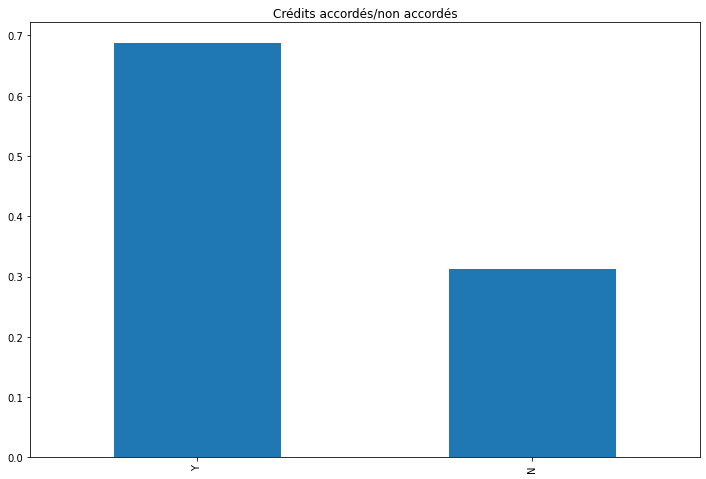

In [88]:
df['Loan_Status'].value_counts(normalize=True).plot.bar(title='Crédits accordés/non accordés', figsize=(12,8))

We can note that the bank grants more credit than it refuses. **68% versus 31%**

> **Categorical Variables**

In [124]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [90]:
df['Gender'].value_counts(normalize=True)*100

Male      81.758958
Female    18.241042
Name: Gender, dtype: float64

<AxesSubplot:title={'center':'Credit History'}>

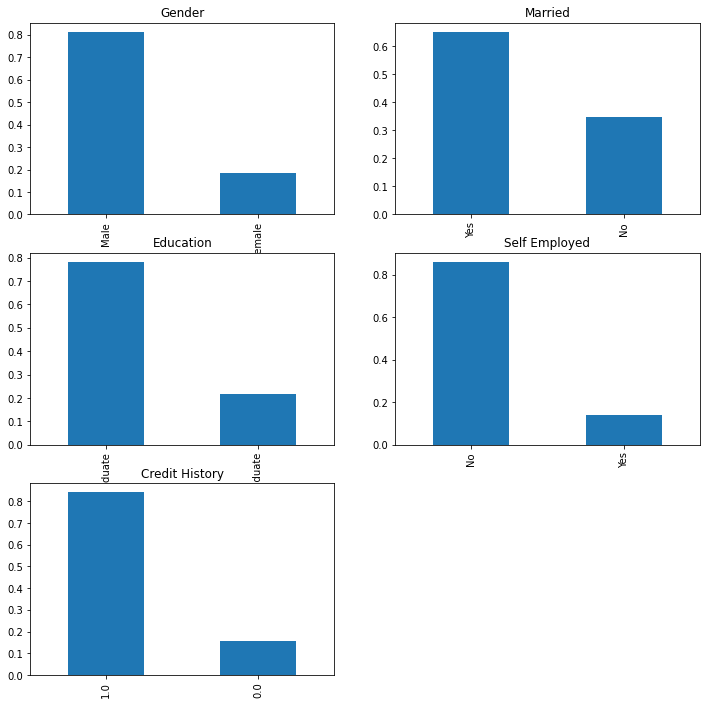

In [125]:
plt.figure()
plt.subplot(321)
df['Gender'].value_counts(normalize=True).plot.bar(figsize=(12,12),title = 'Gender')

plt.subplot(322)
df['Married'].value_counts(normalize=True).plot.bar(figsize=(12,12),title = 'Married')

plt.subplot(323)
df['Education'].value_counts(normalize=True).plot.bar(figsize=(12,12),title = 'Education')

plt.subplot(324)
df['Self_Employed'].value_counts(normalize=True).plot.bar(figsize=(12,12),title = 'Self Employed')

plt.subplot(325)
df['Credit_History'].value_counts(normalize=True).plot.bar(figsize=(12,12),title = 'Credit History')

It can be inferred from the above bar plots that:

* **80%** applicant in the dataset are **male**.
* Around **65%** of the applicant in the dataset are **married**.
* Around **77%** of the applicant in the dataset are **graduates**.
* Around **15%** of the applicant in the dataset are **self_employed**.
* Around **85%** of the applicant in the dataset have repaid their debts.

> **Ordinal Variables**

<AxesSubplot:title={'center':'Property_Area'}>

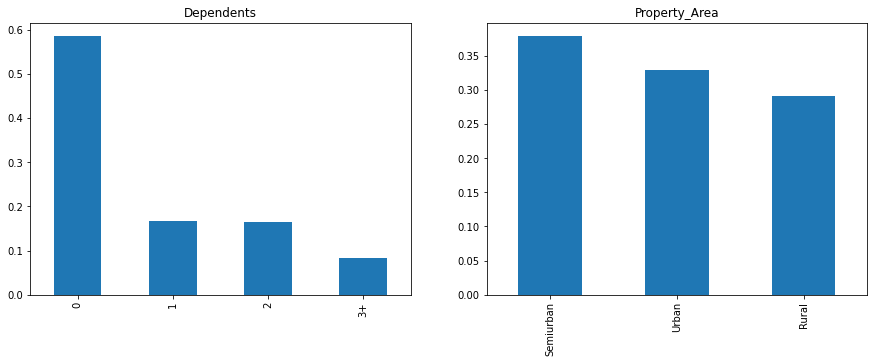

In [92]:
plt.figure()
plt.subplot(121)
df['Dependents'].value_counts(normalize=True).plot.bar(figsize=(15,5),title = 'Dependents')

plt.subplot(122)
df['Property_Area'].value_counts(normalize=True).plot.bar(figsize=(15,5),title = 'Property_Area')

It can made from the above bar plots:
    
* Most of the applicant in the dataset do not have any dependents.
* Most of the applicant in the dataset are from semiurban area.  

> **Numerical Variabes**

In [93]:
df[var_num].describe() #Valeurs abérrentes 

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423
std,6109.041673,2926.248369,84.107233,64.428629
min,150.000000,0.000000,9.000000,12.000000
25%,2877.500000,0.000000,100.250000,360.000000
50%,3812.500000,1188.500000,128.000000,360.000000
75%,5795.000000,2297.250000,164.750000,360.000000
max,81000.000000,41667.000000,700.000000,480.000000


C:\Users\maeva\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


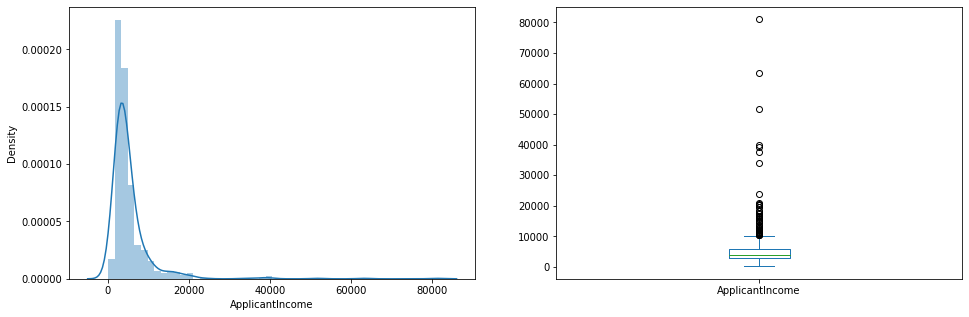

In [94]:
#applicantincome 
plt.figure(1) 
plt.subplot(121) #subfigure
sns.distplot(df['ApplicantIncome'])

plt.subplot(122)
df['ApplicantIncome'].plot.box(figsize=(16,5))

plt.suptitle('')
plt.show()

C:\Users\maeva\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


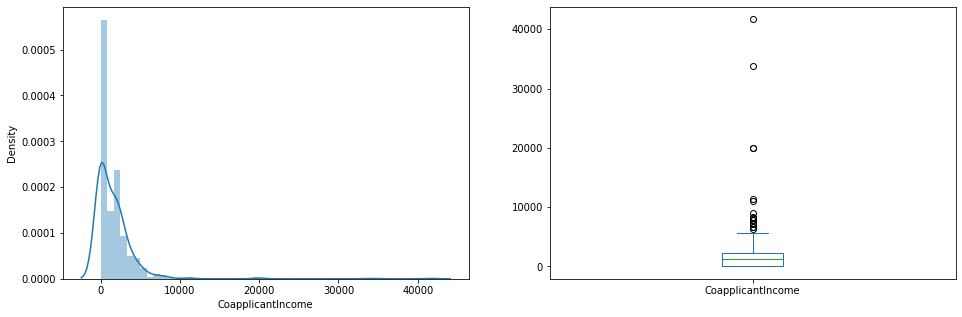

In [18]:
#Coapplicanttincome 
plt.figure(1) 
plt.subplot(121) #subfigure
sns.distplot(df['CoapplicantIncome'])

plt.subplot(122)
df['CoapplicantIncome'].plot.box(figsize=(16,5))

plt.suptitle('')
plt.show()

On the left, it can be inferred that most of the dataset in the distribution of applicant income is not normally distributed.
Moreover, the boxplot confirms the presence of a lot of extreme values/outliers. This can be attributed to income disparity in the society.

## Bivariant Analysis

>Categorical variables

We goin gto study the relationship between each categorical variables, depending on the target variable (loas_status)

* Gender and loan status 

In [95]:
Gender = pd.crosstab(df['Gender'],df['Loan_Status'])
Gender

Loan_Status,N,Y
Gender,,
Female,37,75
Male,155,347


* Married and loan status

In [53]:
Married = pd.crosstab(df['Married'],df['Loan_Status'])
Married

Loan_Status,N,Y
Married,,
No,79,134
Yes,113,288


* Education and Loan Status`

In [21]:
Education = pd.crosstab(df['Education'],df['Loan_Status'])
Education

Loan_Status,N,Y
Education,,
Graduate,140,340
Not Graduate,52,82


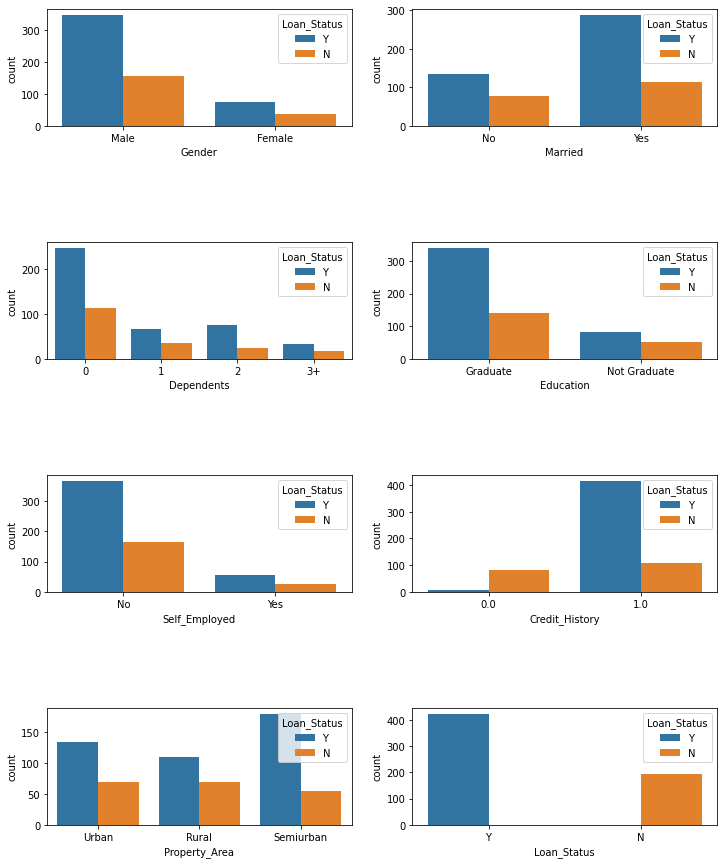

In [96]:
fig,axes=plt.subplots(4,2,figsize=(12,15))
for idx,cat_col in enumerate(var_cat):
    row,col=idx//2,idx%2
    sns.countplot(x=cat_col,data=df,hue='Loan_Status',ax=axes[row,col])
    plt.subplots_adjust(hspace=1)

* We observe that as a woman we have a 50% chance that our credit will be refused against a 40% chance for men.

>Correlation with numerical variables

In [126]:
for i,j in enumerate(var_num):
    print(i,j)

0 ApplicantIncome
1 CoapplicantIncome
2 LoanAmount
3 Loan_Amount_Term


In [146]:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565181,-0.046531,-0.018615
CoapplicantIncome,-0.116605,1.000000,0.189218,-0.059383,0.011134
LoanAmount,0.565181,0.189218,1.000000,0.036960,-0.000607
Loan_Amount_Term,-0.046531,-0.059383,0.036960,1.000000,-0.004705
Credit_History,-0.018615,0.011134,-0.000607,-0.004705,1.000000


<AxesSubplot:title={'center':'Correlation of Features'}>

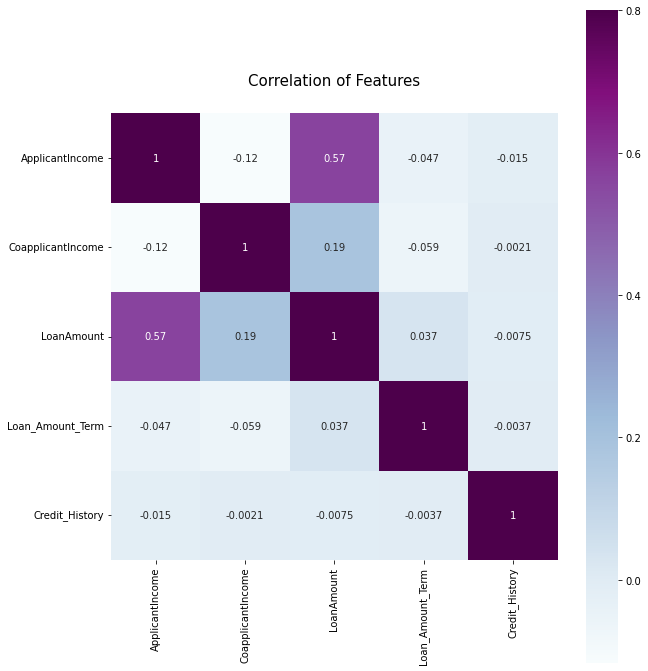

In [127]:
matrix=df.corr()
f,ax=plt.subplots(figsize=(10,12))
plt.title('Correlation of Features', y=1.05, size=15)
sns.heatmap(matrix,vmax=.8,square=True,cmap='BuPu',annot=True) 

* The darker the boxes, the stronger the relationship between the two variables.
For example, we observe that LoanAmont and applicantIncome are closely correlated

## Creation of the ML model

In [7]:
df_cat=df[var_cat]
df_cat

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y
4,Male,No,0,Graduate,No,1.0,Urban,Y
...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,1.0,Urban,Y


In [8]:
df_num=df[var_num]
df_num

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,5849,0.0,128.0,360.0
1,4583,1508.0,128.0,360.0
2,3000,0.0,66.0,360.0
3,2583,2358.0,120.0,360.0
4,6000,0.0,141.0,360.0
...,...,...,...,...
609,2900,0.0,71.0,360.0
610,4106,0.0,40.0,180.0
611,8072,240.0,253.0,360.0
612,7583,0.0,187.0,360.0


In [9]:
df_cat=pd.get_dummies(df_cat,drop_first=True)
df_cat

,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,1.0,1,0,0,0,0,0,0,0,1,1
1,1.0,1,1,1,0,0,0,0,0,0,0
2,1.0,1,1,0,0,0,0,1,0,1,1
3,1.0,1,1,0,0,0,1,0,0,1,1
4,1.0,1,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
609,1.0,0,0,0,0,0,0,0,0,0,1
610,1.0,1,1,0,0,1,0,0,0,0,1
611,1.0,1,1,1,0,0,0,0,0,1,1
612,1.0,1,1,0,1,0,0,0,0,1,1


In [59]:
df['ApplicantIncome'].max()

81000

We going to concatenate the numerical part and the categorical part

In [10]:
df_encoded=pd.concat([df_cat,df_num],axis=1)
df_encoded

,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,1.0,1,0,0,0,0,0,0,0,1,1,5849,0.0,128.0,360.0
1,1.0,1,1,1,0,0,0,0,0,0,0,4583,1508.0,128.0,360.0
2,1.0,1,1,0,0,0,0,1,0,1,1,3000,0.0,66.0,360.0
3,1.0,1,1,0,0,0,1,0,0,1,1,2583,2358.0,120.0,360.0
4,1.0,1,0,0,0,0,0,0,0,1,1,6000,0.0,141.0,360.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1.0,0,0,0,0,0,0,0,0,0,1,2900,0.0,71.0,360.0
610,1.0,1,1,0,0,1,0,0,0,0,1,4106,0.0,40.0,180.0
611,1.0,1,1,1,0,0,0,0,0,1,1,8072,240.0,253.0,360.0
612,1.0,1,1,0,1,0,0,0,0,1,1,7583,0.0,187.0,360.0


In [11]:
df_encoded.head()

,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,1.0,1,0,0,0,0,0,0,0,1,1,5849,0.0,128.0,360.0
1,1.0,1,1,1,0,0,0,0,0,0,0,4583,1508.0,128.0,360.0
2,1.0,1,1,0,0,0,0,1,0,1,1,3000,0.0,66.0,360.0
3,1.0,1,1,0,0,0,1,0,0,1,1,2583,2358.0,120.0,360.0
4,1.0,1,0,0,0,0,0,0,0,1,1,6000,0.0,141.0,360.0


In [77]:
df_encoded.Property_Area.value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

> **training model**

In [39]:
x_train=df_encoded['Loan_Status_Y']
x_train
#Loan Status will be our Y 

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status_Y, Length: 614, dtype: uint8

In [40]:
y_train=df_encoded.drop('Loan_Status_Y',axis=1)
y_train.head()
#All the data except Loan Status

,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,1.0,1,0,0,0,0,0,0,0,1,5849,0.0,128.0,360.0
1,1.0,1,1,1,0,0,0,0,0,0,4583,1508.0,128.0,360.0
2,1.0,1,1,0,0,0,0,1,0,1,3000,0.0,66.0,360.0
3,1.0,1,1,0,0,0,1,0,0,1,2583,2358.0,120.0,360.0
4,1.0,1,0,0,0,0,0,0,0,1,6000,0.0,141.0,360.0


In [41]:
from sklearn.model_selection import train_test_split

In [42]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=6)

In [43]:
x_train.head()

,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
282,1.0,1,1,0,1,0,0,0,0,1,2301,985.799988,78.0,180.0
336,1.0,1,1,1,0,0,0,0,0,0,5250,688.000000,160.0,360.0
409,0.0,1,1,0,0,1,0,0,0,0,81000,0.000000,360.0,360.0
17,0.0,0,0,0,0,0,0,0,0,1,3510,0.000000,76.0,360.0
208,1.0,1,0,0,0,0,0,0,0,1,2479,0.000000,59.0,360.0


In [44]:
x_test.head()

,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
387,0.0,1,1,0,0,0,1,0,0,1,3010,3136.0,128.0,360.0
266,1.0,1,1,0,1,0,0,0,1,0,4708,1387.0,150.0,360.0
292,1.0,1,1,0,1,0,0,0,0,1,3153,1560.0,134.0,360.0
392,1.0,1,1,0,0,0,0,0,0,1,2583,2115.0,120.0,360.0
332,1.0,1,0,0,0,0,0,0,0,1,2833,0.0,71.0,360.0


In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

>**Build model**

In [19]:
models=[]
models.append(("Logistic Regression",LogisticRegression()))
models.append(("Decision Tree",DecisionTreeClassifier()))
models.append(("Linear Discriminant Analysis",LinearDiscriminantAnalysis()))
models.append(("Random Forest",RandomForestClassifier()))
models.append(("Support Vector Classifier",SVC()))
models.append(("K- Neirest Neighbour",KNeighborsClassifier()))
models.append(("Naive Bayes",GaussianNB()))

In [20]:
scoring='accuracy'

In [21]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
result=[]
names=[]

In [45]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

LR=LogisticRegression()
LR.fit(x_train,y_train)
pred=LR.predict(x_test)
print("Model Accuracy:- ",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Model Accuracy:-  0.8373983739837398
[[14 19]
 [ 1 89]]
              precision    recall  f1-score   support

           0       0.93      0.42      0.58        33
           1       0.82      0.99      0.90        90

    accuracy                           0.84       123
   macro avg       0.88      0.71      0.74       123
weighted avg       0.85      0.84      0.81       123



C:\Users\maeva\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


>**tester le model**

In [46]:
print(pred)

[0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0
 0 1 1 1 1 1 1 1 1 1 1 1]


In [59]:
X_test=df_encoded.iloc[:, :14]

In [60]:
X_test.head()

,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,ApplicantIncome,CoapplicantIncome,LoanAmount
0,1.0,1,0,0,0,0,0,0,0,1,1,5849,0.0,128.0
1,1.0,1,1,1,0,0,0,0,0,0,0,4583,1508.0,128.0
2,1.0,1,1,0,0,0,0,1,0,1,1,3000,0.0,66.0
3,1.0,1,1,0,0,0,1,0,0,1,1,2583,2358.0,120.0
4,1.0,1,0,0,0,0,0,0,0,1,1,6000,0.0,141.0


In [61]:
prediction = LR.predict(X_test)

In [62]:
print(prediction)

[1 1 1 0 1 0 1 0 1 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 1 1 0 0 0
 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0
 1 1 0 0 0 0 1 1 1 0 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 1 0 1 1
 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 1 1 1 1 0 1 0 0 1 0 1 1 1 1 0 1 1
 0 1 0 0 1 1 1 0 1 1 0 0 1 1 0 1 1 0 1 0 1 1 0 0 1 0 1 0 1 0 1 0 0 0 1 0 1
 0 0 1 0 1 1 1 1 1 1 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 0 1
 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 1 0 1 0
 1 0 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 0 1
 1 1 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 1 0 0 1 1 1 1 1 1 0 0 1 0 0 0 0 1 0 1 1
 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0
 1 1 0 0 1 1 0 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 0 0 0 1 0 1 1 1 0
 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 0 0 0
 0 1 1 1 0 0 0 1 0 0 1 1 1 0 1 1 0 1 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 1 1
 1 0 1 1 0 0 0 1 1 0 0 1 

In [65]:
#Faire une prevision :par exemple si on prend un client quelconque, est-ce qu'on peut lui accorder un credit ou non
profil_test=[[1,1,1,0,0,0,1,0,1,0,100,0,400,360]]
LR.predict(profil_test)

array([1], dtype=uint8)

* Le credit sera accorde a la personne selon le model

>importer pickle

In [68]:
#On va enregistrer le modele pour l'utiliser sur l'application web

import pickle

In [79]:
# now y can save it to a file
pickle.dump(LR,open('ML_Model.pkl','wb'))

In [77]:
with open('ML_Model.pkl', 'rb') as f:
    k = pickle.load(f)

In [78]:
profil = k.predict([[1,1,1,0,0,0,1,0,1,0,100,0,400,360]])
print(profil)

[1]
